In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/scaled_data.csv", index_col=0)

In [3]:
data


,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,year,season_spring,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,1,-0.827613,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,2018,1,...,0,0,1,0,0,0,0,0,0,0
1,0,1,-0.722069,0.480996,0.748899,-1.046996,-1.917480,-1.916078,2018,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,-1.635432,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,2018,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1,-1.615560,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,2018,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,-1.468226,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,2018,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,-1.319509,0.177576,2.059845,-0.877902,-1.149528,-1.237414,2019,1,...,1,0,0,0,0,0,0,0,0,0
726,0,0,-1.324068,-0.264634,-0.452029,-0.299193,-0.774854,-0.730355,2019,1,...,1,0,0,0,0,0,0,0,0,0
727,0,0,-1.324068,0.880424,-0.853182,-1.006180,-1.588999,-1.636962,2019,1,...,1,0,0,0,0,0,0,0,0,0
728,0,1,-1.310404,-1.014341,2.067858,-0.707351,-1.428608,-1.401782,2019,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   holiday                   730 non-null    int64  
 1   workingday                730 non-null    int64  
 2   temp                      730 non-null    float64
 3   hum                       730 non-null    float64
 4   windspeed                 730 non-null    float64
 5   casual                    730 non-null    float64
 6   registered                730 non-null    float64
 7   cnt                       730 non-null    float64
 8   year                      730 non-null    int64  
 9   season_spring             730 non-null    int64  
 10  season_summer             730 non-null    int64  
 11  season_winter             730 non-null    int64  
 12  weekday_Monday            730 non-null    int64  
 13  weekday_Saturday          730 non-null    int64  
 14  weekday_Su

In [5]:
data.shape

(730, 31)

In [6]:
data.isnull().sum()

holiday                     0
workingday                  0
temp                        0
hum                         0
windspeed                   0
casual                      0
registered                  0
cnt                         0
year                        0
season_spring               0
season_summer               0
season_winter               0
weekday_Monday              0
weekday_Saturday            0
weekday_Sunday              0
weekday_Thursday            0
weekday_Tuesday             0
weekday_Wednesday           0
weathersit_Light Snow       0
weathersit_Mist + Cloudy    0
month_August                0
month_December              0
month_February              0
month_January               0
month_July                  0
month_June                  0
month_March                 0
month_May                   0
month_November              0
month_October               0
month_September             0
dtype: int64

<Axes: >

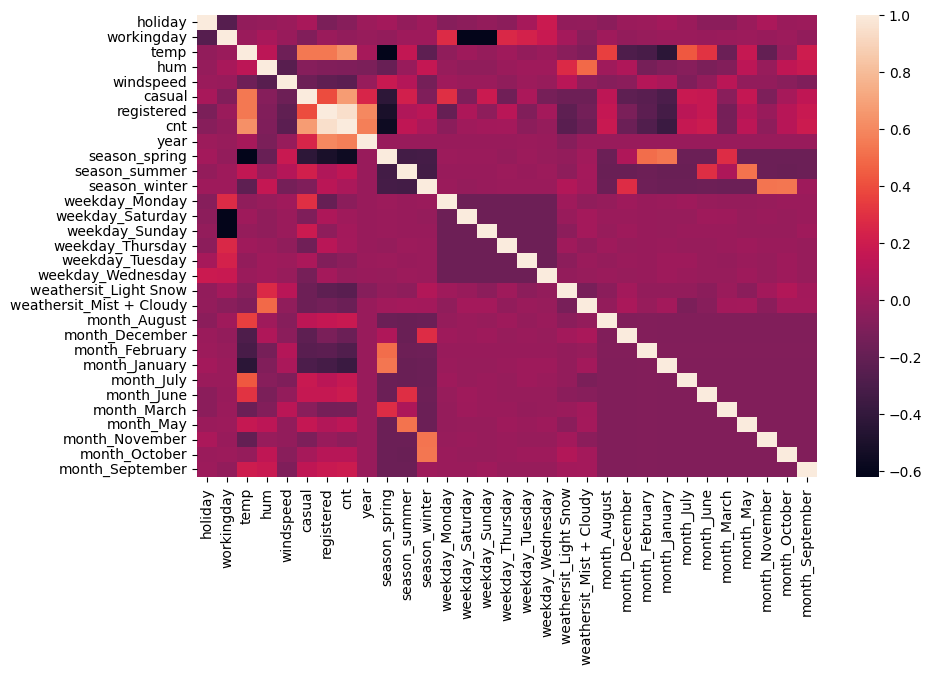

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr)

In [8]:
correlations = data.corr()['cnt'].abs().sort_values(ascending=False)
top_10_correlated = correlations[1:11]
print(top_10_correlated)

registered               0.945411
casual                   0.672123
temp                     0.627044
year                     0.569728
season_spring            0.561702
month_January            0.367167
month_February           0.273848
weathersit_Light Snow    0.240602
windspeed                0.235132
month_June               0.195568
Name: cnt, dtype: float64


**Multicollinearity problem**(Independent vriables are correlated)

In [10]:
correlations = data.corr()
correlations = correlations.where(np.triu(np.ones(correlations.shape, dtype=bool), k=1))
correlations = correlations.unstack().reset_index()
correlations.columns = ['VAR1', 'VAR2', 'Correlation']
correlations.dropna(subset=["Correlation"], inplace=True)
correlations["Correlation"] = correlations["Correlation"].abs()
correlations.sort_values(by='Correlation', ascending=False, inplace=True)
correlations.head(15)

,VAR1,VAR2,Correlation
223,cnt,registered,0.945411
222,cnt,casual,0.672123
219,cnt,temp,0.627044
281,season_spring,temp,0.619408
404,weekday_Saturday,workingday,0.608682
435,weekday_Sunday,workingday,0.608682
254,year,registered,0.596911
255,year,cnt,0.569728
286,season_spring,cnt,0.561702
157,casual,temp,0.542731


In [45]:
#Dropping highly correlated  variables
data_n= data.drop(['season_spring','workingday','registered','casual','season_winter'],axis=1)

### **Splitting the Data into Train and Test**

In [46]:
# Import the required library
from sklearn.model_selection import train_test_split



In [47]:
# Put all the feature variables in X
x = data_n.drop(['cnt'],axis=1)
x.head()

,holiday,temp,hum,windspeed,year,season_summer,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,0,-0.827613,1.252343,-0.387833,2018,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,-0.722069,0.480996,0.748899,2018,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,-1.635432,-1.338073,0.745931,2018,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,-1.615560,-0.261577,-0.389769,2018,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,-1.468226,-1.340294,-0.046477,2018,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Put the target variable in y
y = data_n['cnt']
y.head()

0   -1.820972
1   -1.916078
2   -1.632827
3   -1.522732
4   -1.503090
Name: cnt, dtype: float64

In [49]:
# Split the dataset into 70% train and 30% test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3,random_state=100)

### **Model Building**

In [50]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [51]:
# Summary
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
mlr = sm.OLS(y_train, x_train_sm)
mlr = mlr.fit()
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     100.9
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          3.78e-174
Time:                        13:45:39   Log-Likelihood:                -262.01
No. Observations:                 510   AIC:                             576.0
Df Residuals:                     484   BIC:                             686.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2115.2051     76.159    -27.773      0.000   -2264.849   -1965.562
holiday                     -0.4417      0.122     -3.630      0.000      -0.681      -0.203
temp                         0.4610      0.049      9.355      0.000       0.364       0.558
hum                         -0.1021      0.026     -3.856      0.000      -0.154      -0.050
windspeed                   -0.1507      0.020     -7.532      0.000      -0.190      -0.111
year                         1.0479      0.038     27.773      0.000       0.974       1.122
season_summer                0.2990      0.093      3.214      0.001       0.116       0.482
weekday_Monday              -0.1107      0.068     -1.634      0.103      -0.244       0.022
weekday_Saturday             0.0137      0.071      0.195      0.846      -0.125       0.152
weekday_Sunday               0.0543      0.070      0.777      0.437      -0.083       0.192
weekday_Thursday             0.0289      0.070      0.416      0.678      -0.108       0.166
weekday_Tuesday             -0.0958      0.068     -1.405      0.161      -0.230       0.038
weekday_Wednesday           -0.0276      0.071     -0.389      0.697      -0.167       0.112
weathersit_Light Snow       -1.1164      0.124     -9.039      0.000      -1.359      -0.874
weathersit_Mist + Cloudy    -0.2614      0.049     -5.338      0.000      -0.358      -0.165
month_August                 0.1845      0.141      1.308      0.192      -0.093       0.462
month_December               0.1859      0.140      1.325      0.186      -0.090       0.462
month_February              -0.2481      0.145     -1.716      0.087      -0.532       0.036
month_January               -0.3722      0.148     -2.513      0.012      -0.663      -0.081
month_July                  -0.0695      0.149     -0.465      0.642      -0.363       0.224
month_June                   0.0292      0.116      0.252      0.801      -0.198       0.257
month_March                 -0.0547      0.109     -0.502      0.616      -0.269       0.160
month_May                    0.0913      0.099      0.926      0.355      -0.102       0.285
month_November               0.4100      0.135      3.027      0.003       0.144       0.676
month_October                0.6203      0.133      4.660      0.000       0.359       0.882
month_September              0.5888      0.137      4.288      0.000       0.319       0.859
==============================================================================
Omnibus:                       73.011   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.753
Skew:                          -0.777   Prob(JB):                     2.04e-35
Kurtosis:                       5.259   Cond. No.                     

# Feature Selection using RFE(Recursive Feature Elimination)

In [52]:
# Import RFE
from sklearn.feature_selection import RFE
#setting feature selection variables to 15
rfe = RFE(model, n_features_to_select = 15)

#fitting rfe ofject on our training dataset
rfe = rfe.fit(x_train, y_train)



In [53]:
# Let's take a look at which features have been selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('season_summer', True, 1),
 ('weekday_Monday', False, 2),
 ('weekday_Saturday', False, 11),
 ('weekday_Sunday', False, 8),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 7),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1),
 ('month_August', True, 1),
 ('month_December', True, 1),
 ('month_February', True, 1),
 ('month_January', True, 1),
 ('month_July', False, 5),
 ('month_June', False, 9),
 ('month_March', False, 6),
 ('month_May', False, 4),
 ('month_November', True, 1),
 ('month_October', True, 1),
 ('month_September', True, 1)]

In [54]:
# Put all the columns selected by RFE in the variable 'col'
col = x_train.columns[rfe.support_]
#checking the values of true_rfe
col

Index(['holiday', 'temp', 'windspeed', 'year', 'season_summer',
       'weekday_Tuesday', 'weathersit_Light Snow', 'weathersit_Mist + Cloudy',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_November', 'month_October', 'month_September'],
      dtype='object')

In [55]:
# Select only the columns selected by RFE
x_train = x_train[col]

#fitting the model
model.fit(x_train,y_train)

# Summary
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
mlr = sm.OLS(y_train, x_train_sm)
mlr = mlr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 21 Nov 2023   Prob (F-statistic):          2.10e-179
Time:                        13:45:56   Log-Likelihood:                -274.94
No. Observations:                 510   AIC:                             581.9
Df Residuals:                     494   BIC:                             649.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2146.8050     76.083    -28.217      0.000   -2296.292   -1997.318
holiday                     -0.4442      0.121     -3.681      0.000      -0.681      -0.207
temp                         0.4460      0.032     14.010      0.000       0.383       0.509
windspeed                   -0.1314      0.019     -6.809      0.000      -0.169      -0.093
year                         1.0636      0.038     28.216      0.000       0.989       1.138
season_summer                0.3468      0.061      5.664      0.000       0.227       0.467
weekday_Tuesday             -0.1054      0.052     -2.020      0.044      -0.208      -0.003
weathersit_Light Snow       -1.3201      0.114    -11.561      0.000      -1.544      -1.096
weathersit_Mist + Cloudy    -0.3646      0.040     -9.030      0.000      -0.444      -0.285
month_August                 0.2013      0.078      2.581      0.010       0.048       0.354
month_December               0.1703      0.094      1.820      0.069      -0.014       0.354
month_February              -0.2070      0.102     -2.032      0.043      -0.407      -0.007
month_January               -0.3569      0.102     -3.486      0.001      -0.558      -0.156
month_November               0.4100      0.089      4.599      0.000       0.235       0.585
month_October                0.5942      0.083      7.197      0.000       0.432       0.756
month_September              0.5854      0.081      7.185      0.000       0.425       0.745
==============================================================================
Omnibus:                       68.317   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.441
Skew:                          -0.758   Prob(JB):                     8.67e-31
Kurtosis:                       5.054   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Check with VIF**

In [56]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,year,7.69
1,temp,2.83
11,month_January,2.65
4,season_summer,2.64
9,month_December,2.12
10,month_February,1.98
12,month_November,1.97
13,month_October,1.69
8,month_August,1.68
7,weathersit_Mist + Cloudy,1.61
